Suavisado de punto de interes

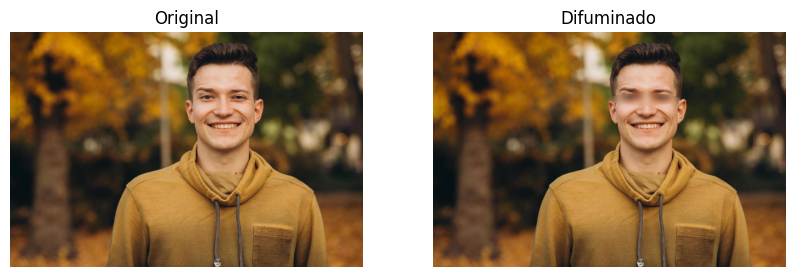

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoqueROI(img, centro, x, y):
    img1 = np.copy(img)
    valx, valy = centro
    mediax = x // 2
    mediay = y // 2
    mascara = np.zeros_like(img, dtype=np.uint8)
    cv2.ellipse(mascara, (valx, valy), (mediax, mediay), 0, 0, 360, (255, 255, 255), -1)
    desenfoque = cv2.GaussianBlur(img1, (65, 65), 0)
    img1[mascara == 255] = desenfoque[mascara == 255]
    return img1

imagen = cv2.imread("HUmano.jpg")
imagenrgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
img_desenfoque = desenfoqueROI(imagenrgb, (880, 280), 300, 50)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagenrgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_desenfoque)
plt.title("Difuminado")
plt.axis("off")

plt.show()


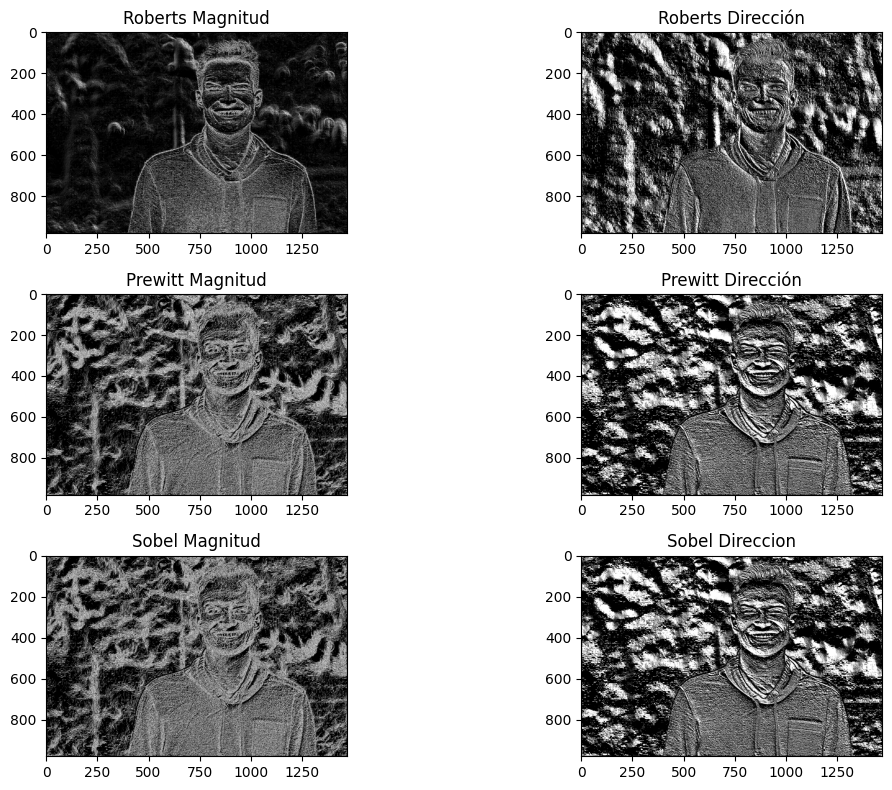

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Humano.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Robert
robertsx = np.array([[-1, 0], [0, 1]])

robertsy = np.array([[0, -1], [1, 0]])
img_robx = cv2.filter2D(img_gray, -1, robertsx)
img_roby = cv2.filter2D(img_gray, -1, robertsy)
rob_gMagnitud = np.sqrt(img_robx**2 + img_roby**3)
rob_gDireccion = np.arctan2(img_roby, img_robx)

#Prewitt
prewittx = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

prewitty = np.array([[1, 1, 1],
                     [0, 0, 0],
                     [-1, -1, -1]])
img_prex = cv2.filter2D(img_gray, -1, prewittx)
img_prey = cv2.filter2D(img_gray, -1, prewitty)
pre_gMagnitud = np.sqrt(img_prex**2 + img_prey**3)
pre_gDireccion = np.arctan2(img_prey, img_prex)

#Sobet
sobelx = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

sobely = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
img_sobx = cv2.filter2D(img_gray, -1, sobelx)
img_soby = cv2.filter2D(img_gray, -1, sobely)
sob_gMagnitud = np.sqrt(img_sobx**2 + img_soby**3)
sob_gDireccion = np.arctan2(img_soby, img_sobx)

plt.figure(figsize=(12, 8))

#Robert
plt.subplot(3, 2, 1)
plt.title("Roberts Magnitud")
plt.imshow(rob_gMagnitud, cmap='gray')

plt.subplot(3, 2, 2)
plt.title("Roberts Dirección")
plt.imshow(rob_gDireccion, cmap='gray')

#Prewitt
plt.subplot(3, 2, 3)
plt.title("Prewitt Magnitud")
plt.imshow(pre_gMagnitud, cmap='gray')

plt.subplot(3, 2, 4)
plt.title("Prewitt Dirección")
plt.imshow(pre_gDireccion, cmap='gray')

#Sobel
plt.subplot(3, 2, 5)
plt.title("Sobel Magnitud")
plt.imshow(sob_gMagnitud, cmap="gray")

plt.subplot(3, 2, 6)
plt.title("Sobel Direccion")
plt.imshow(sob_gDireccion, cmap="gray")

plt.tight_layout()
plt.show()


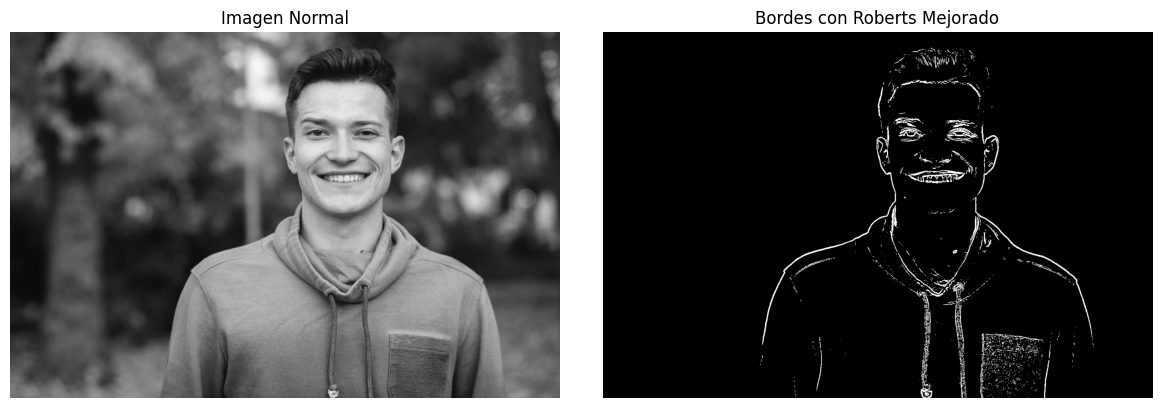

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def roberts_mejorado(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(img_gray, (3, 3), 0)

    kernelx = np.array([[2, 0], [0, -2]], dtype=np.float32)
    kernely = np.array([[0, 2], [-2, 0]], dtype=np.float32)

    robx = cv2.filter2D(suavizado, cv2.CV_16S, kernelx)
    roby = cv2.filter2D(suavizado, cv2.CV_16S, kernely)

    roberts = cv2.addWeighted(np.abs(robx), 0.7, np.abs(roby), 0.7, 0)
    _, bordes = cv2.threshold(roberts, 30, 255, cv2.THRESH_BINARY)
    return bordes

img = cv2.imread('Humano.jpg')
resultado = roberts_mejorado(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Imagen Normal")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(resultado, cmap="gray")
plt.title("Bordes con Roberts Mejorado")
plt.axis('off')


plt.tight_layout()
plt.show()


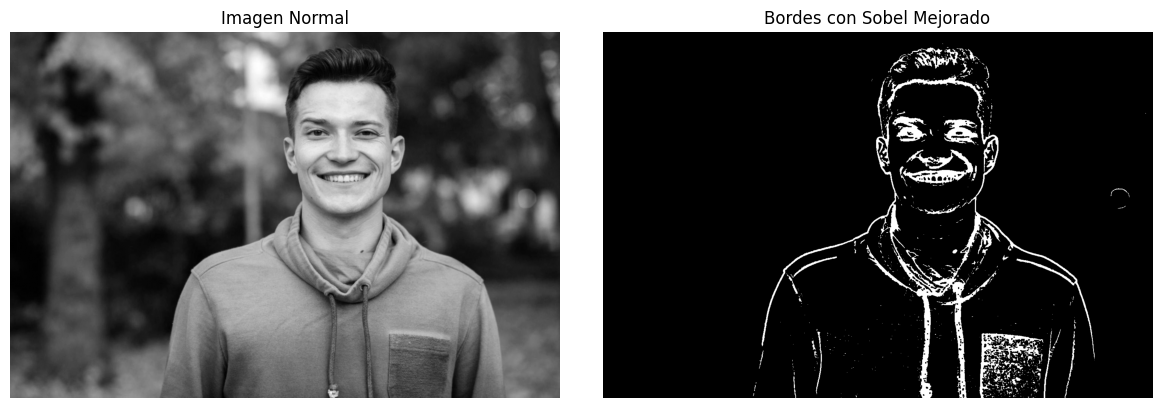

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_mejor(imagen, tam_kernel=3):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)

    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=tam_kernel)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=tam_kernel)

    magnitud = np.sqrt(sobelx**2 + sobely**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud = np.uint8(magnitud)

    _, bordes = cv2.threshold(magnitud, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    bordes_unidos = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel)
    return img_gray, bordes_unidos

imagen = cv2.imread('Humano.jpg')
img_gray, resultado = sobel_mejor(imagen)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Imagen Normal")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(resultado, cmap="gray")
plt.title("Bordes con Sobel Mejorado")
plt.axis("off")

plt.tight_layout()
plt.show()


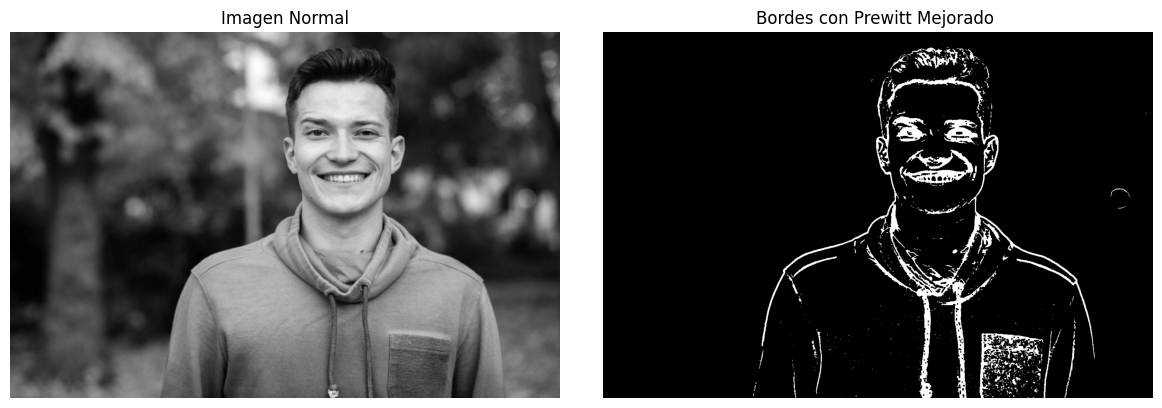

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt_mejor(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)

    prewittx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)

    prewitty = np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]], dtype=np.float32)

    x = cv2.filter2D(img_gray, cv2.CV_32F, prewittx)
    y = cv2.filter2D(img_gray, cv2.CV_32F, prewitty)

    magnitud = np.sqrt(x**2 + y**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud = np.uint8(magnitud)

    _, bordes = cv2.threshold(magnitud, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    bordes_unidos = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel)
    return img_gray, bordes_unidos

imagen = cv2.imread('Humano.jpg')
img_gray, resultado = prewitt_mejor(imagen)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Imagen Normal")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(resultado, cmap="gray")
plt.title("Bordes con Prewitt Mejorado ")
plt.axis("off")

plt.tight_layout()
plt.show()


SIN MEJORAR Y CON MEJORAR ROBERT

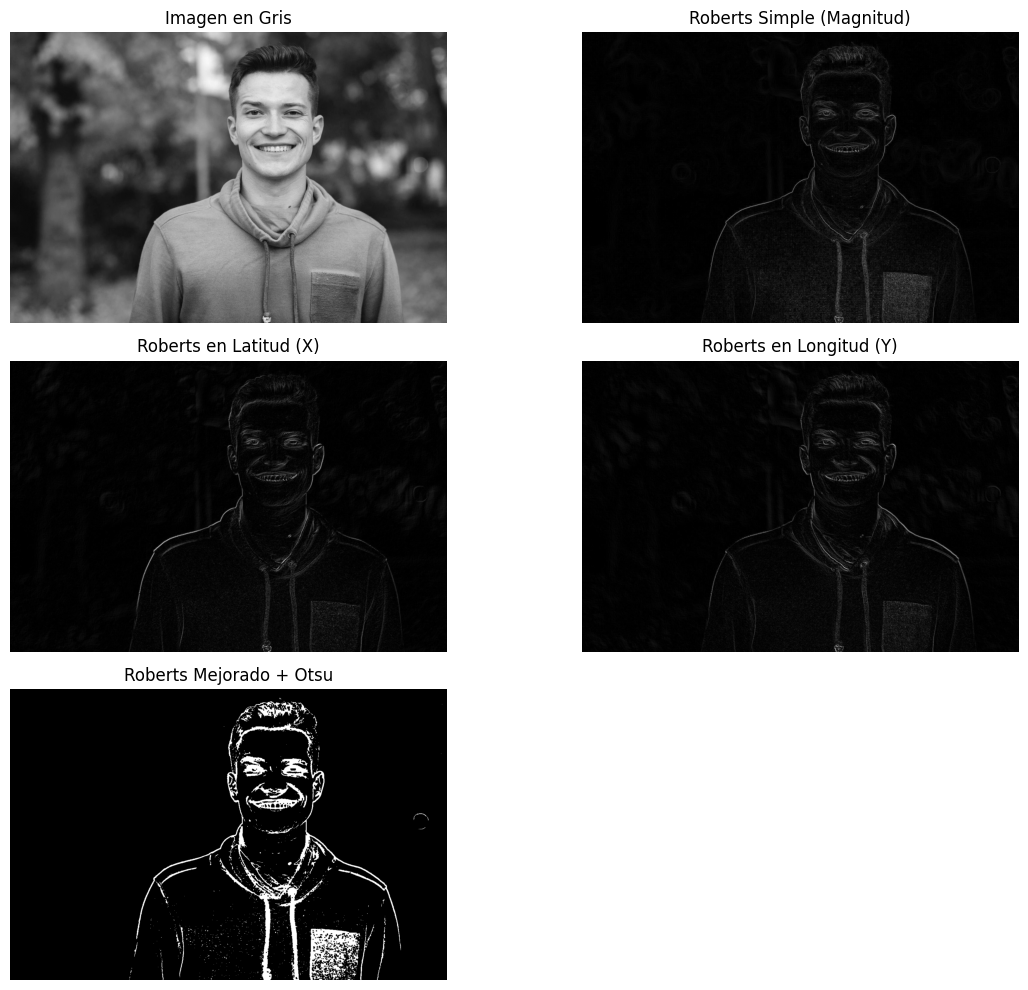

In [82]:
def roberts_simple(imagen):
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    kernel_x = np.array([[-1, 0],
                         [ 0, 1]], dtype=np.float32)

    kernel_y = np.array([[0, -1],
                         [1,  0]], dtype=np.float32)

    grad_x = cv2.filter2D(gris, cv2.CV_32F, kernel_x)
    grad_y = cv2.filter2D(gris, cv2.CV_32F, kernel_y)

    magnitud = np.sqrt(grad_x**2 + grad_y**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud = np.uint8(magnitud)

    return gris, magnitud

def roberts_mejorado(imagen):
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(gris, (3, 3), 0)

    kernel_x = np.array([[-1, 0],
                         [ 0, 1]], dtype=np.float32)

    kernel_y = np.array([[0, -1],
                         [1,  0]], dtype=np.float32)

    grad_lat = cv2.filter2D(suavizado, cv2.CV_32F, kernel_x)
    grad_lon = cv2.filter2D(suavizado, cv2.CV_32F, kernel_y)

    grad_lat_abs = cv2.normalize(np.abs(grad_lat), None, 0, 255, cv2.NORM_MINMAX)
    grad_lon_abs = cv2.normalize(np.abs(grad_lon), None, 0, 255, cv2.NORM_MINMAX)

    magnitud = np.sqrt(grad_lat**2 + grad_lon**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud = np.uint8(magnitud)

    _, otsu = cv2.threshold(magnitud, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    mejorado = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel)

    return grad_lat_abs, grad_lon_abs, mejorado

imagen = cv2.imread("Humano.jpg")

gris, simple = roberts_simple(imagen)
latitud, longitud, mejorado = roberts_mejorado(imagen)

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.imshow(gris, cmap='gray')
plt.title("Imagen en Gris")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(simple, cmap='gray')
plt.title("Roberts Simple (Magnitud)")
plt.axis("off")

plt.subplot(3, 2, 3)
plt.imshow(latitud, cmap='gray')
plt.title("Roberts en Latitud (X)")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.imshow(longitud, cmap='gray')
plt.title("Roberts en Longitud (Y)")
plt.axis("off")

plt.subplot(3, 2, 5)
plt.imshow(mejorado, cmap='gray')
plt.title("Roberts Mejorado + Otsu")
plt.axis("off")

plt.tight_layout()
plt.show()



SIN MEJORAR Y CON MEJORAR PREWITT

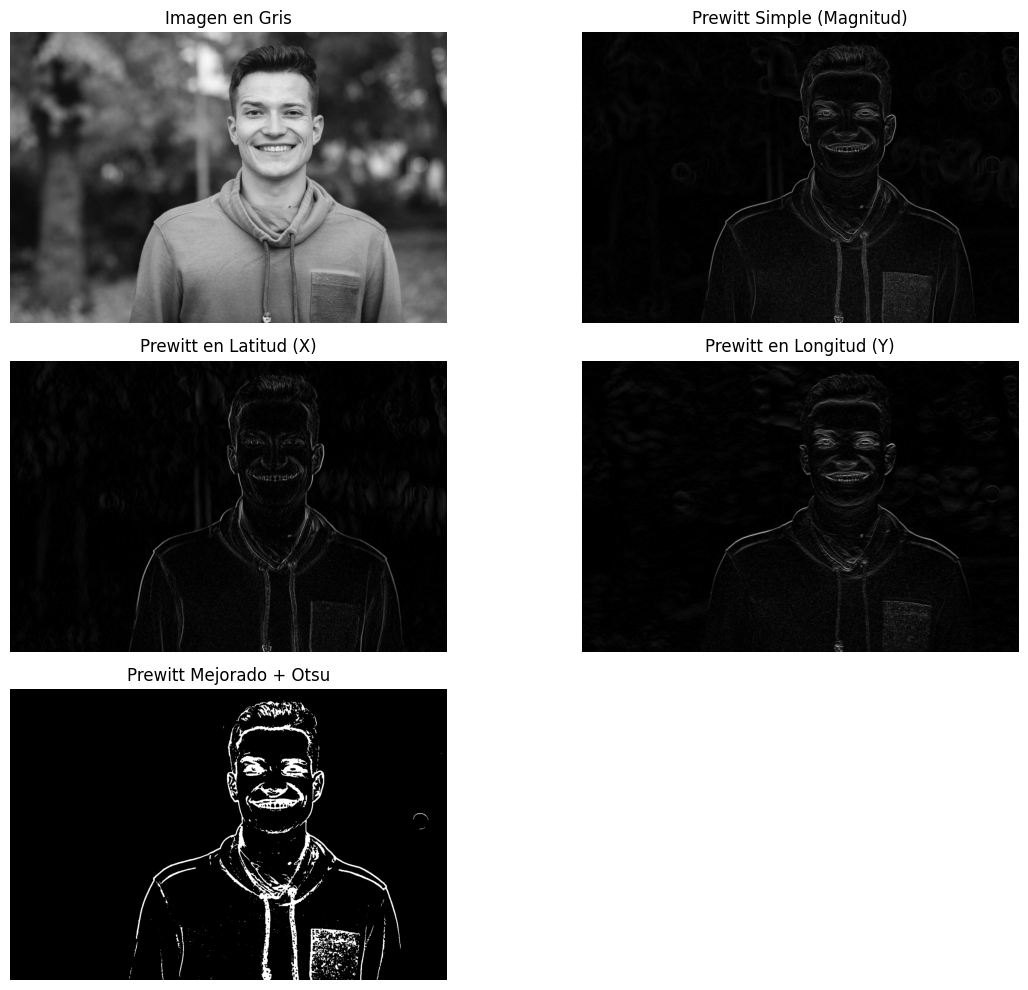

In [81]:
def prewitt_simple(imagen):
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    prewittx = np.array([[1, 0, -1],
                         [1, 0, -1],
                         [1, 0, -1]], dtype=np.float32)

    prewitty = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]], dtype=np.float32)

    grad_x = cv2.filter2D(gris, cv2.CV_32F, prewittx)
    grad_y = cv2.filter2D(gris, cv2.CV_32F, prewitty)

    magnitud = np.sqrt(grad_x**2 + grad_y**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud = np.uint8(magnitud)

    return gris, magnitud

def prewitt_mejorado(imagen):
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(gris, (3, 3), 0)

    prewittx = np.array([[1, 0, -1],
                         [1, 0, -1],
                         [1, 0, -1]], dtype=np.float32)

    prewitty = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]], dtype=np.float32)

    grad_lat = cv2.filter2D(suavizado, cv2.CV_32F, prewittx)  
    grad_lon = cv2.filter2D(suavizado, cv2.CV_32F, prewitty)  

    grad_lat_abs = cv2.normalize(np.abs(grad_lat), None, 0, 255, cv2.NORM_MINMAX)
    grad_lon_abs = cv2.normalize(np.abs(grad_lon), None, 0, 255, cv2.NORM_MINMAX)

    magnitud = np.sqrt(grad_lat**2 + grad_lon**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud = np.uint8(magnitud)

    _, otsu = cv2.threshold(magnitud, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    mejorado = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel)

    return grad_lat_abs, grad_lon_abs, mejorado

imagen = cv2.imread("Humano.jpg")

gris, simple = prewitt_simple(imagen)
latitud, longitud, mejorado = prewitt_mejorado(imagen)

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.imshow(gris, cmap='gray')
plt.title("Imagen en Gris")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(simple, cmap='gray')
plt.title("Prewitt Simple (Magnitud)")
plt.axis("off")

plt.subplot(3, 2, 3)
plt.imshow(latitud, cmap='gray')
plt.title("Prewitt en Latitud (X)")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.imshow(longitud, cmap='gray')
plt.title("Prewitt en Longitud (Y)")
plt.axis("off")

plt.subplot(3, 2, 5)
plt.imshow(mejorado, cmap='gray')
plt.title("Prewitt Mejorado + Otsu")
plt.axis("off")

plt.tight_layout()
plt.show()



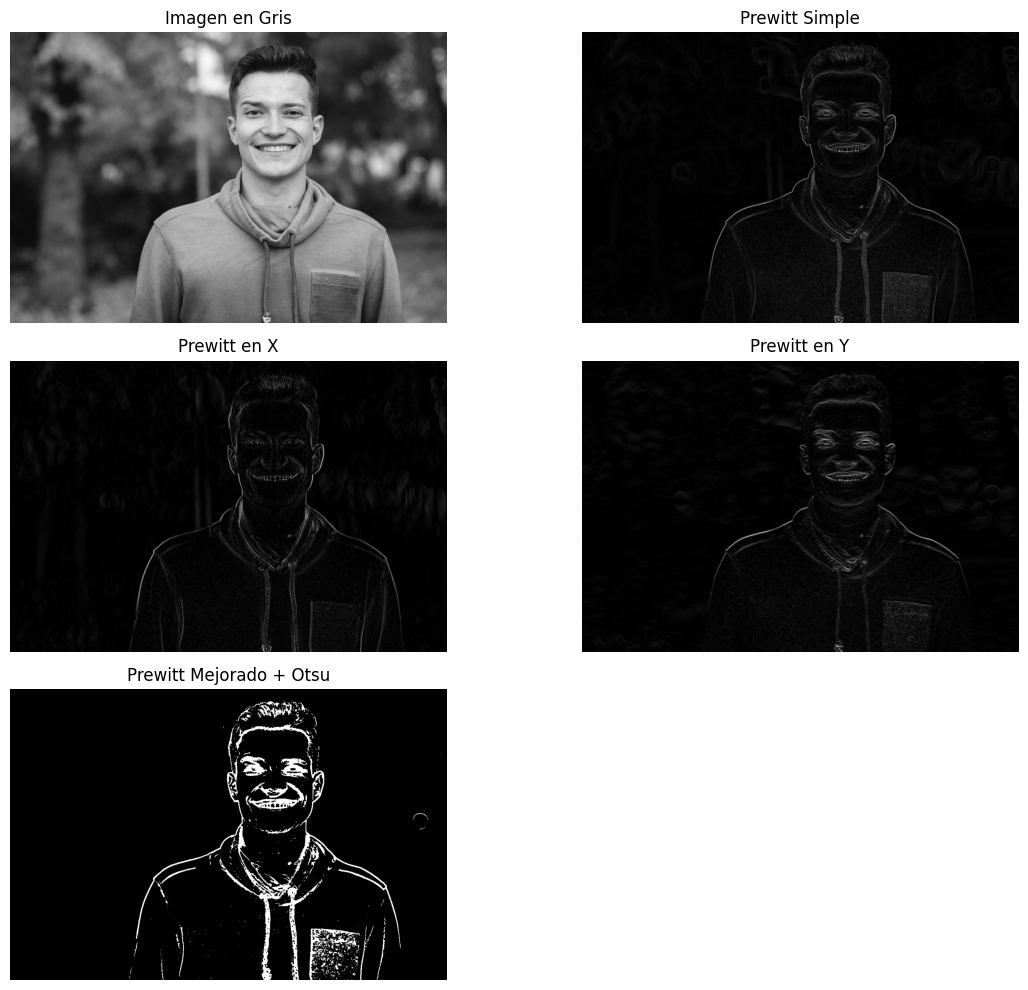

In [80]:
def prewitt_simple(imagen):
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    prewittx = np.array([[1, 0, -1],
                         [1, 0, -1],
                         [1, 0, -1]], dtype=np.float32)

    prewitty = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]], dtype=np.float32)

    grad_x = cv2.filter2D(gris, cv2.CV_32F, prewittx)
    grad_y = cv2.filter2D(gris, cv2.CV_32F, prewitty)

    magnitud = np.sqrt(grad_x**2 + grad_y**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud = np.uint8(magnitud)

    return gris, magnitud

def prewitt_mejorado(imagen):
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(gris, (3, 3), 0)

    prewittx = np.array([[1, 0, -1],
                         [1, 0, -1],
                         [1, 0, -1]], dtype=np.float32)

    prewitty = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]], dtype=np.float32)

    grad_x = cv2.filter2D(suavizado, cv2.CV_32F, prewittx)
    grad_y = cv2.filter2D(suavizado, cv2.CV_32F, prewitty)

    grad_x_abs = cv2.normalize(np.abs(grad_x), None, 0, 255, cv2.NORM_MINMAX)
    grad_y_abs = cv2.normalize(np.abs(grad_y), None, 0, 255, cv2.NORM_MINMAX)

    magnitud = np.sqrt(grad_x**2 + grad_y**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud = np.uint8(magnitud)

    _, otsu = cv2.threshold(magnitud, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    mejorado = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel)

    return grad_x_abs, grad_y_abs, mejorado

imagen = cv2.imread("Humano.jpg")

gris, simple = prewitt_simple(imagen)
enx, eny, mejorado = prewitt_mejorado(imagen)

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.imshow(gris, cmap='gray')
plt.title("Imagen en Gris")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(simple, cmap='gray')
plt.title("Prewitt Simple")
plt.axis("off")

plt.subplot(3, 2, 3)
plt.imshow(enx, cmap='gray')
plt.title("Prewitt en X")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.imshow(eny, cmap='gray')
plt.title("Prewitt en Y")
plt.axis("off")

plt.subplot(3, 2, 5)
plt.imshow(mejorado, cmap='gray')
plt.title("Prewitt Mejorado + Otsu")
plt.axis("off")

plt.tight_layout()
plt.show()



SIMPLE Y MEJORA SOBEL

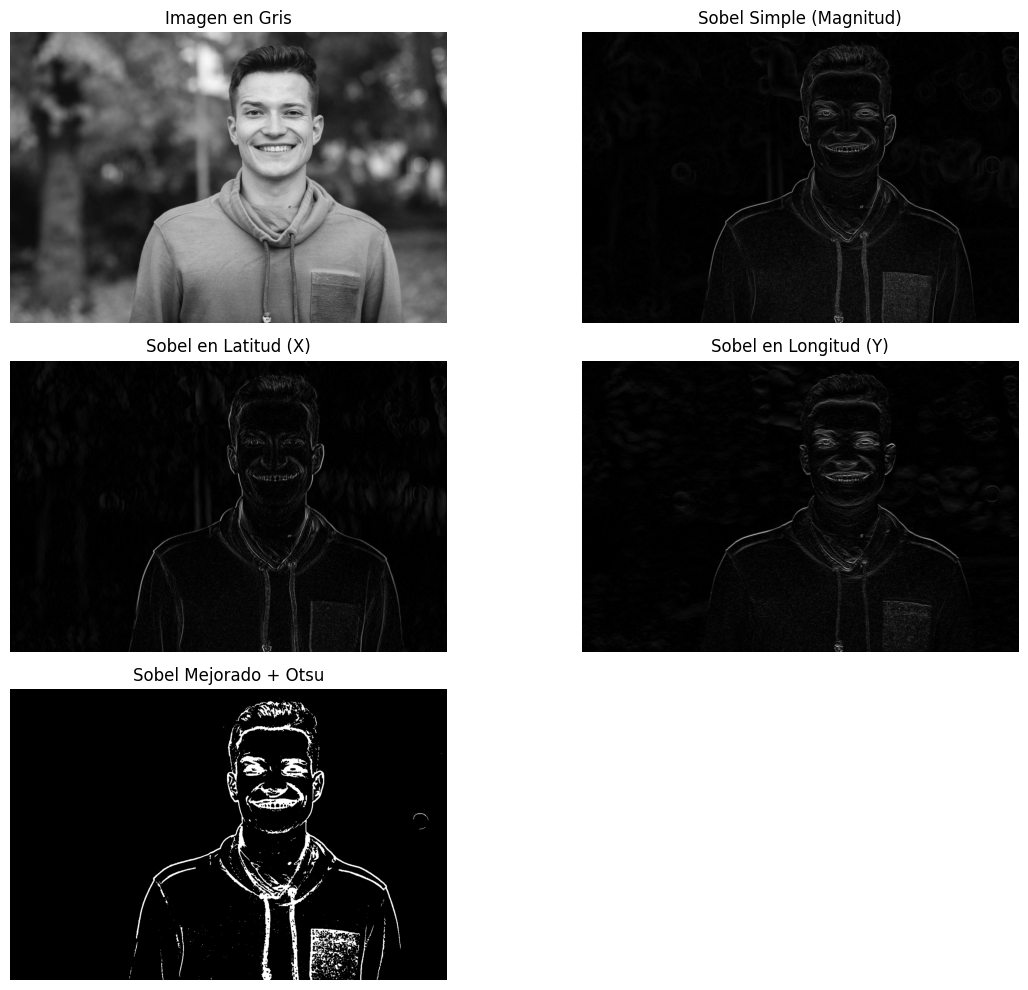

In [83]:
def sobel_simple(imagen):
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    grad_x = cv2.Sobel(gris, cv2.CV_32F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gris, cv2.CV_32F, 0, 1, ksize=3)

    magnitud = np.sqrt(grad_x**2 + grad_y**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud = np.uint8(magnitud)

    return gris, magnitud

def sobel_mejorado(imagen):
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(gris, (3, 3), 0)

    grad_lat = cv2.Sobel(suavizado, cv2.CV_32F, 1, 0, ksize=3)
    grad_lon = cv2.Sobel(suavizado, cv2.CV_32F, 0, 1, ksize=3)

    grad_lat_abs = cv2.normalize(np.abs(grad_lat), None, 0, 255, cv2.NORM_MINMAX)
    grad_lon_abs = cv2.normalize(np.abs(grad_lon), None, 0, 255, cv2.NORM_MINMAX)

    magnitud = np.sqrt(grad_lat**2 + grad_lon**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)
    magnitud = np.uint8(magnitud)

    _, otsu = cv2.threshold(magnitud, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    mejorado = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel)

    return grad_lat_abs, grad_lon_abs, mejorado

imagen = cv2.imread("Humano.jpg")

gris, simple = sobel_simple(imagen)
latitud, longitud, mejorado = sobel_mejorado(imagen)

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.imshow(gris, cmap='gray')
plt.title("Imagen en Gris")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(simple, cmap='gray')
plt.title("Sobel Simple (Magnitud)")
plt.axis("off")

plt.subplot(3, 2, 3)
plt.imshow(latitud, cmap='gray')
plt.title("Sobel en Latitud (X)")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.imshow(longitud, cmap='gray')
plt.title("Sobel en Longitud (Y)")
plt.axis("off")

plt.subplot(3, 2, 5)
plt.imshow(mejorado, cmap='gray')
plt.title("Sobel Mejorado + Otsu")
plt.axis("off")

plt.tight_layout()
plt.show()
